In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import re
# render text as text not as outline
plt.rcParams['svg.fonttype'] = 'none'

In [18]:
cities = pd.read_csv("AMTOVZ_CSV_WGS84.csv", sep=";", header=1)\
    .drop_duplicates(subset='Ortschaftsname')
# remove the municipality name
cities['Ortschaftsname'] = cities['Ortschaftsname'].str.replace(r'\s*\(.*?\)', '', regex=True)
cities.tail()

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,Kantonskürzel,E,N,Sprache,Validity
5763,Eschen,9492,0,Eschen,7007,NaN,9.522327,47.209002,de,2008-07-01
5764,Mauren FL,9493,0,Eschen,7007,NaN,9.540693,47.225488,de,2008-07-01
5765,Schaanwald,9486,0,Mauren,7008,NaN,9.562057,47.215106,de,2008-07-01
5769,Ruggell,9491,0,Ruggell,7010,NaN,9.534510,47.248397,de,2008-07-01
5770,Schellenberg,9488,0,Schellenberg,7011,NaN,9.547854,47.231755,de,2008-07-01


In [19]:
# Load Switzerland outline from https://www.naturalearthdata.com/
world = gpd.read_file('ne_10m_admin_0_countries')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


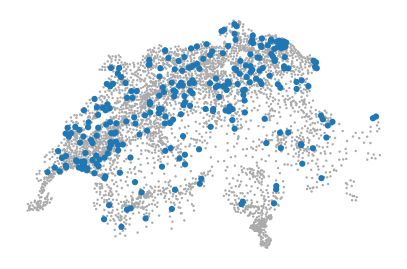

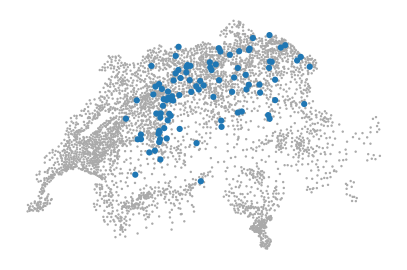

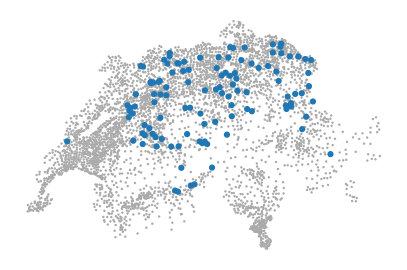

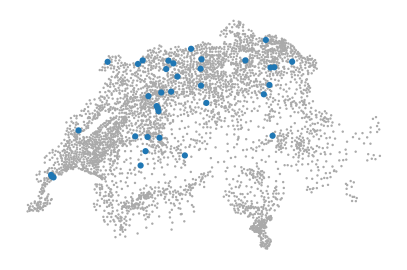

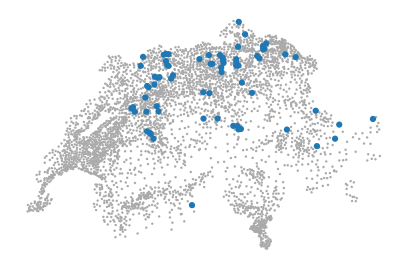

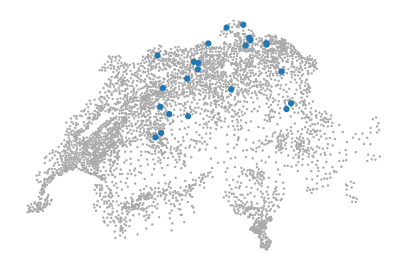

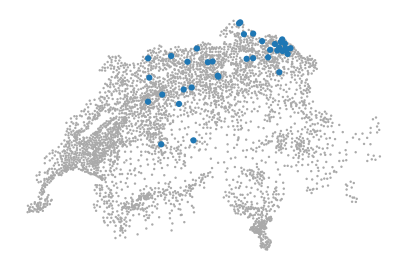

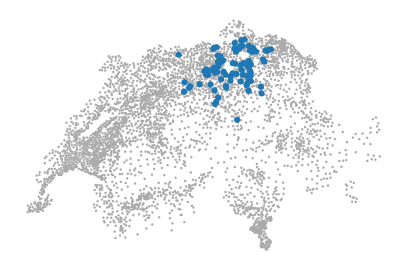

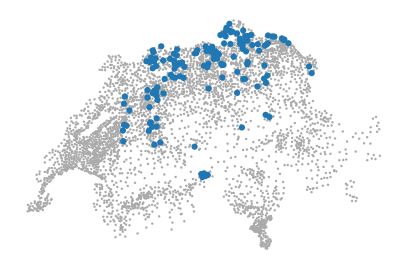

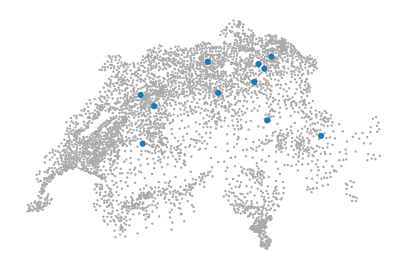

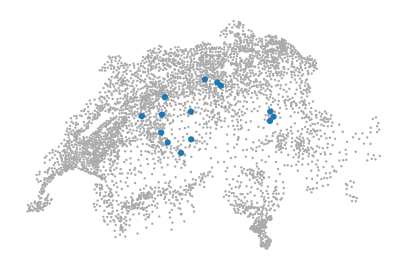

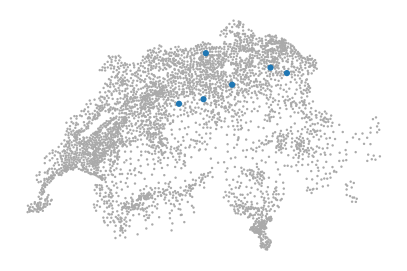

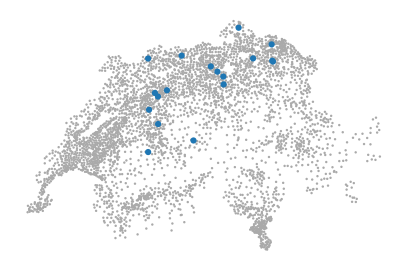

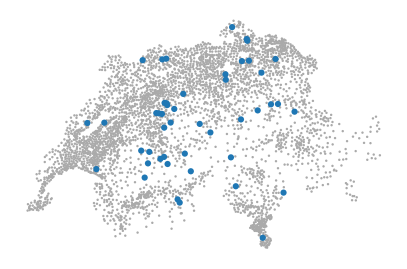

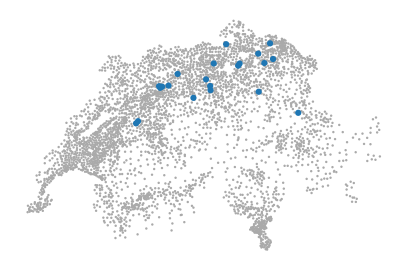

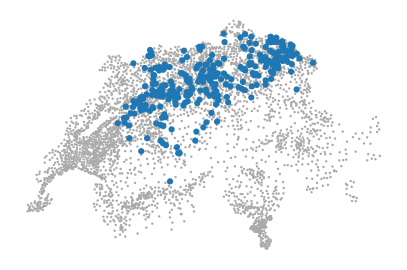

In [107]:
switzerland = world[world.ADMIN == 'Switzerland']

endings = "au bach bur heim rüti ikon ingen hof dorf wil berg tal stetten schwand stat wang".split()
for ending in sorted(endings):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    specific_ending = cities["Ortschaftsname"].str.contains(f"{ending}\s*", regex=True, flags=re.IGNORECASE) 

    # All other cities
    without_ending = cities[~specific_ending]
    gdf = gpd.GeoDataFrame(without_ending, geometry=gpd.points_from_xy(without_ending['E'], without_ending['N']))
    # Set the initial CRS to WGS84 (EPSG:4326) if not already set, the normal projection of switzerland on most maps
    gdf.set_crs(epsg=4326, inplace=True)
    gdf.plot(ax=ax, markersize=3, alpha=1, color='#aaa', edgecolor='none')

    # Cities with specific ending
    with_ending = cities[specific_ending]
    gdf = gpd.GeoDataFrame(with_ending, geometry=gpd.points_from_xy(with_ending['E'], with_ending['N']))
    # Set the initial CRS to WGS84 (EPSG:4326) if not already set, the normal projection of switzerland on most maps
    gdf.set_crs(epsg=4326, inplace=True)
    gdf.plot(ax=ax, markersize=20, alpha=1, edgecolor='none')

    ax.set_facecolor('none')  # Set the axis background to be transparent
    
    plt.axis('off')
    plt.savefig(f"{ending}_{len(with_ending)}.png", bbox_inches='tight', transparent=True)
    plt.show()

In [106]:
cities[cities["Ortschaftsname"].str.contains("au\s*", regex=True, flags=re.IGNORECASE)]\
    .groupby(['Kantonskürzel']).count()

,Ortschaftsname,PLZ,Zusatzziffer,Gemeindename,BFS-Nr,E,N,Sprache,Validity
Kantonskürzel,,,,,,,,,
AG,17,17,17,17,17,17,17,17,17
AI,2,2,2,2,2,2,2,2,2
AR,4,4,4,4,4,4,4,4,4
BE,39,39,39,39,39,39,39,39,39
BL,8,8,8,8,8,8,8,8,8
FR,22,22,22,22,22,22,22,22,22
GL,1,1,1,1,1,1,1,1,1
GR,19,19,19,19,19,19,19,19,19
JU,7,7,7,7,7,7,7,7,7
